In [86]:
import pandas as pd
import numpy as np
%matplotlib inline
import pmdarima as pm

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df= pd.read_csv(r"C:\Users\Chirag\test3.csv")


In [87]:
#Making Date Time our index
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
df.index = date_time
df.head()


,CPRAVG,PROP,BUT,FLW,COT,TEMP,PRESS,DRAFT,ETH
Date Time,,,,,,,,,
2009-01-01 00:10:00,0.428151,18.960609,3.973630,30711.65039,820.118210,632.399261,0.466357,-5.616851,75.809700
2009-01-01 00:20:00,0.427783,18.960360,3.973562,30700.66016,819.662811,633.057602,0.475288,-5.540349,75.810066
2009-01-01 00:30:00,0.427432,19.009649,4.181924,30689.66016,819.886444,631.841385,0.464559,-5.628389,75.552841
2009-01-01 00:40:00,0.427082,19.155710,3.950392,30678.66016,819.660171,632.495224,0.471809,-5.576591,75.580223
2009-01-01 00:50:00,0.426732,19.334640,3.689848,30667.66016,819.646805,632.388214,0.470504,-5.274679,75.638023


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12468 entries, 2009-01-01 00:10:00 to 2009-03-28 14:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPRAVG  12468 non-null  float64
 1   PROP    12468 non-null  float64
 2   BUT     12468 non-null  float64
 3   FLW     12468 non-null  float64
 4   COT     12468 non-null  float64
 5   TEMP    12468 non-null  float64
 6   PRESS   12468 non-null  float64
 7   DRAFT   12468 non-null  float64
 8   ETH     12468 non-null  float64
dtypes: float64(9)
memory usage: 974.1 KB


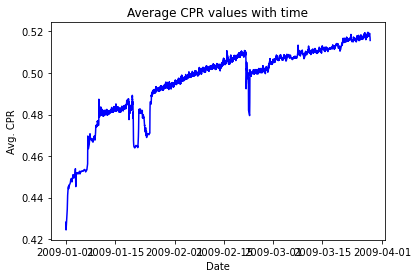

In [89]:
#Plotting the CPRAVG data

import matplotlib.pyplot as plt
plt.title('Average CPR values with time')
plt.xlabel('Date')
plt.ylabel('Avg. CPR')
plt.plot(df['CPRAVG'],color = 'blue')

In [66]:
#Printing list of columns:
cols = list(df)[0:df.shape[1]]
print(cols)

['CPRAVG', 'PROP', 'BUT', 'FLW', 'COT', 'TEMP', 'PRESS', 'DRAFT', 'ETH']


In [67]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [68]:
adf_test(df['CPRAVG'])

Augmented Dickey-Fuller Test: 
ADF test statistic         -3.844039
p-value                     0.002488
# lags used                 8.000000
# observations          12459.000000
critical value (1%)        -3.430875
critical value (5%)        -2.861772
critical value (10%)       -2.566893
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [91]:
auto_arima(df['CPRAVG'],max_p=10,max_d=10,max_q=10,seasonal=False,m=1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                12468
Model:               SARIMAX(1, 1, 1)   Log Likelihood               82899.051
Date:                Wed, 04 Aug 2021   AIC                        -165790.102
Time:                        20:33:55   BIC                        -165760.378
Sample:                             0   HQIC                       -165780.150
                              - 12468                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     5.6e-06    3.4e-06      1.646      0.100   -1.07e-06    1.23e-05
ar.L1          0.0510      0.001     37.715      0.000       0.048       0.054
ma.L1          0.2013      0.001    152.867      0.000       0.199       0.204
sigma2      9.814e-08    2.6e-10    377.398      0.000    9.76e-08    9.86e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1619426.59
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.35e+16. Standard errors may be unstable.
"""

In [70]:
len(df)

12468

In [92]:
#Splitting the data:
split_length = 0.99
train_df = df[0:int(split_length*df.shape[0])]
val_df = df[int(split_length*df.shape[0]):df.shape[0]]
print(val_df)

                       CPRAVG       PROP       BUT          FLW         COT  \
Date Time                                                                     
2009-03-27 17:20:00  0.517393  22.681259  3.755996  28690.06055  853.198364   
2009-03-27 17:30:00  0.517707  23.238979  4.043783  28688.57031  853.346619   
2009-03-27 17:40:00  0.518145  23.874350  4.143183  28687.08984  853.178970   
2009-03-27 17:50:00  0.517609  23.826420  4.226301  28685.59961  853.339218   
2009-03-27 18:00:00  0.517287  23.716391  4.229255  28684.10938  853.260345   
...                       ...        ...       ...          ...         ...   
2009-03-28 13:20:00  0.516947  22.566521  4.234831  28546.11914  853.335480   
2009-03-28 13:30:00  0.516790  23.644880  4.081517  28570.01953  853.114197   
2009-03-28 13:40:00  0.516591  23.736650  4.371761  28593.91992  853.182159   
2009-03-28 13:50:00  0.516339  23.319229  4.153561  28617.82031  853.211716   
2009-03-28 14:00:00  0.515635  22.664320  4.087688  

In [93]:
model = SARIMAX(train_df['CPRAVG'],exog = train_df[['PROP', 'BUT', 'FLW', 'COT', 'TEMP', 'PRESS', 'DRAFT', 'ETH']],order=(1,1,1),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 CPRAVG   No. Observations:                12343
Model:               SARIMAX(1, 1, 1)   Log Likelihood               82918.045
Date:                Wed, 04 Aug 2021   AIC                        -165814.091
Time:                        20:36:13   BIC                        -165732.462
Sample:                    01-01-2009   HQIC                       -165786.746
                         - 03-27-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PROP        2.724e-05   1.16e-05      2.345      0.019    4.47e-06       5e-05
BUT        -2.379e-05   1.35e-05     -1.765      0.078   -5.02e-05    2.63e-06
FLW         -2.62e-06   1.44e-08   -181.356      0.000   -2.65e-06   -2.59e-06
COT        -6.861e-06   3.73e-06     -1.841      0.066   -1.42e-05    4.43e-07
TEMP        1.082e-05   2.95e-06      3.663      0.000    5.03e-06    1.66e-05
PRESS          0.0086      0.000     28.528      0.000       0.008       0.009
DRAFT        2.41e-05   8.16e-05      0.295      0.768      -0.000       0.000
ETH        -1.218e-05   9.37e-06     -1.300      0.194   -3.05e-05    6.18e-06
ar.L1         -0.1564      0.002    -76.840      0.000      -0.160      -0.152
ma.L1          0.2890      0.002    141.874      0.000       0.285       0.293
sigma2      8.575e-08    4.1e-10    209.184      0.000    8.49e-08    8.66e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):            199453.23
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.92e+16. Standard errors may be unstable.
"""

In [94]:
start=len(train_df)
end=df.shape[0]-1
exog_forecast= val_df[['PROP', 'BUT', 'FLW', 'COT', 'TEMP', 'PRESS', 'DRAFT', 'ETH']] 
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,1,1) Predictions')

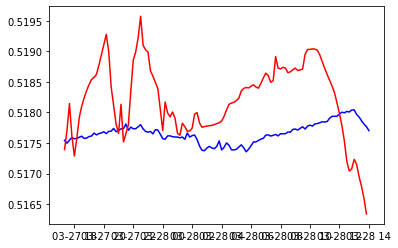

In [95]:
plt.plot(predictions, color = 'blue')
plt.plot(df['CPRAVG'][start:end], color = 'red')

In [81]:
predictions

2009-03-26 20:30:00    0.517527
2009-03-26 20:40:00    0.517548
2009-03-26 20:50:00    0.517538
2009-03-26 21:00:00    0.517546
2009-03-26 21:10:00    0.517569
                         ...   
2009-03-28 13:20:00    0.517913
2009-03-28 13:30:00    0.517851
2009-03-28 13:40:00    0.517796
2009-03-28 13:50:00    0.517754
2009-03-28 14:00:00    0.517690
Freq: 10T, Name: SARIMAX(1,1,1) Predictions, Length: 250, dtype: float64